# Pipeline output

In [84]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import time

## Output simulation

In [85]:
pop = pd.read_csv('../output/E08000032/ssm_E08000032_MSOA11_ppp_2011_simulation.csv')

/anaconda3/envs/vivarium_public_health_spenser/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [137]:
# print some summary stats on the simulation
print('alive', len(pop[pop['alive'] == 'alive']))
print('dead', len(pop[pop['alive'] == 'dead']))
print('emigrated', len(pop[pop['alive'] == 'emigrated']))
print('internal migration', len(pop[pop['internal_outmigration'] == 'Yes']))
print('New children', len(pop[pop['parent_id'] != -1]))
print('Immigrants', len(pop[pop['immigrated'].astype(str) == 'Yes']))

alive 531400
dead 4276
emigrated 1557
internal migration 16841
New children 9609
Immigrants 4509


## Mortality

In [87]:
#min_time = pop["entrance_time"].min().strftime("%Y-%m-%d")
min_time = "2011-01-01"
max_time = datetime.datetime.strptime("2011-12-31", "%Y-%m-%d")

print("min_time:", min_time)
print("max_time:", max_time)

min_time: 2011-01-01
max_time: 2011-12-31 00:00:00


In [88]:
# --- input
# intervals for plotting (in days)
interval_in_days = 10
# list of ethnicities
sel_ethnicity = ["WBI", "WHO"]

# Population (total, for selected ethnicities, gender)
total_population = len(pop)
total_population_ETH = len(pop[pop["ethnicity"].isin(sel_ethnicity)])
total_population_male = len(pop[pop["sex"] == 1])
total_population_female = len(pop[pop["sex"] == 2])

time_axis = []
population_axis = []
population_ETH_axis = []
population_M_axis = []
population_F_axis = []

curr_time = datetime.datetime.strptime(min_time, "%Y-%m-%d")
while curr_time <= max_time:
    time_axis.append(curr_time)
    
    # dead population until current time (changes in the while loop)
    pop_dead = pop[pop["exit_time"] <= curr_time.strftime("%Y-%m-%d")]
    
    num_dead_population = total_population - len(pop_dead)
    population_axis.append(num_dead_population)
    
    num_dead_population_eth = total_population_ETH - len(pop_dead[pop_dead["ethnicity"].isin(sel_ethnicity)])
    population_ETH_axis.append(num_dead_population_eth)
    
    num_dead_male = total_population_male - len(pop_dead[pop_dead["sex"] == 1])
    population_M_axis.append(num_dead_male)
    
    num_dead_female = total_population_female - len(pop_dead[pop_dead["sex"] == 2])
    population_F_axis.append(num_dead_female)
    
    # go to next time, according to the selected interval_in_days
    curr_time = datetime.datetime.strptime(curr_time.strftime("%Y-%m-%d"), "%Y-%m-%d")
    curr_time += datetime.timedelta(days=interval_in_days)

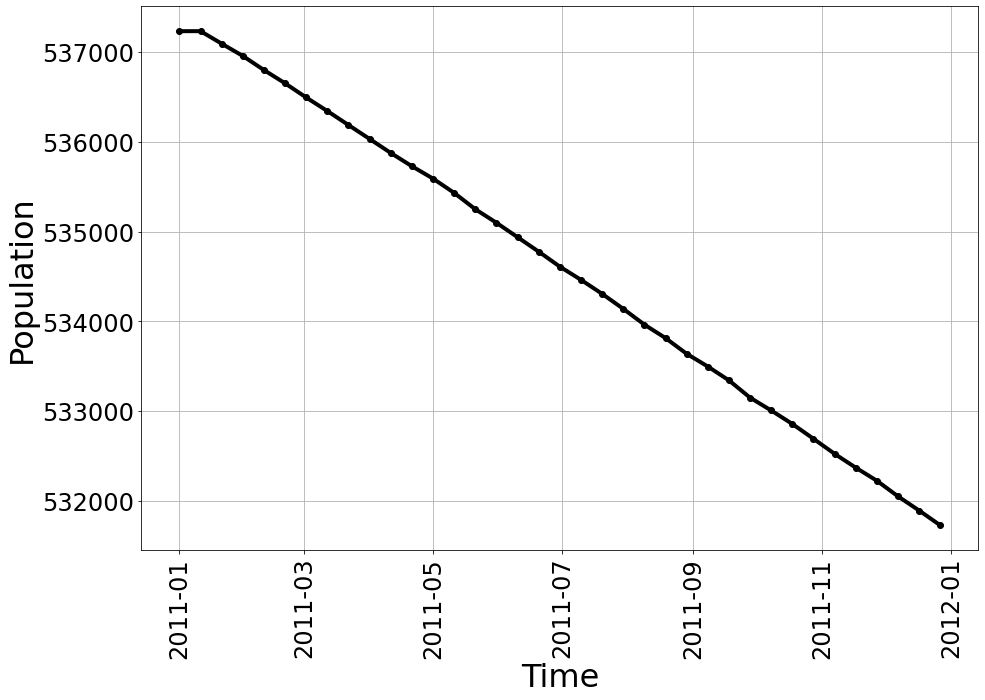

In [89]:
from pandas.plotting import register_matplotlib_converters
# Population (total)
plt.figure(figsize=(15, 10))
plt.plot(time_axis, population_axis, 
         c='k', lw=4, marker="o")
plt.xlabel("Time", size=32)
plt.ylabel("Population", size=32)
plt.xticks(size=24, rotation=90)
plt.yticks(size=24)
plt.grid()
plt.show()

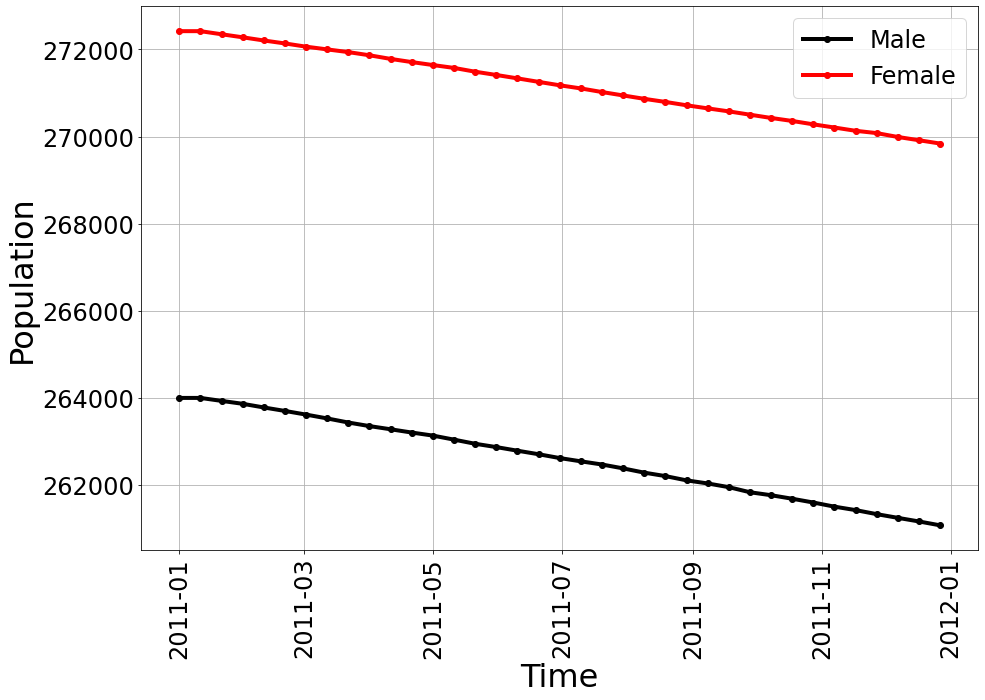

In [90]:
# Population (gender)
plt.figure(figsize=(15, 10))
plt.plot(time_axis, population_M_axis, 
         c='k', lw=4, marker="o", 
         label="Male"
        )
plt.plot(time_axis, population_F_axis, 
         c='r', lw=4, marker="o",
         label="Female"
        )
plt.xlabel("Time", size=32)
plt.ylabel("Population", size=32)
plt.xticks(size=24, rotation=90)
plt.yticks(size=24)
plt.grid()
plt.legend(fontsize=24)
plt.show()

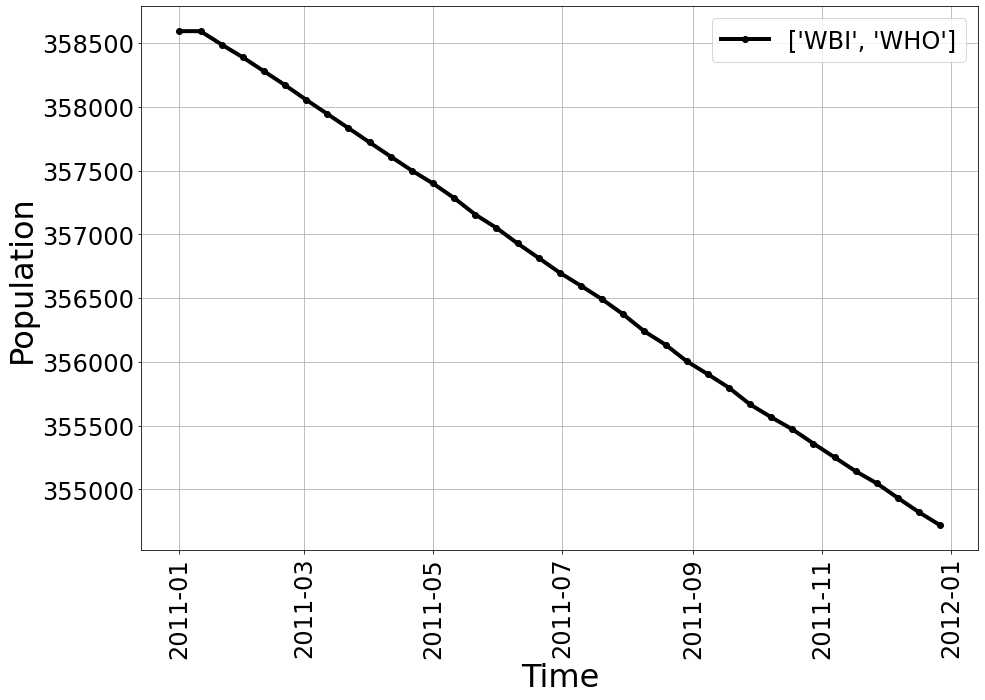

In [91]:
# Population (ethnicity)
plt.figure(figsize=(15, 10))
plt.plot(time_axis, population_ETH_axis, 
         c='k', lw=4, marker="o", 
         label=sel_ethnicity
        )
plt.xlabel("Time", size=32)
plt.ylabel("Population", size=32)
plt.xticks(size=24, rotation=90)
plt.yticks(size=24)
plt.grid()
plt.legend(fontsize=24)
plt.show()

In [106]:
# only dead population
pop_dead = pop[pop["alive"] == "dead"]

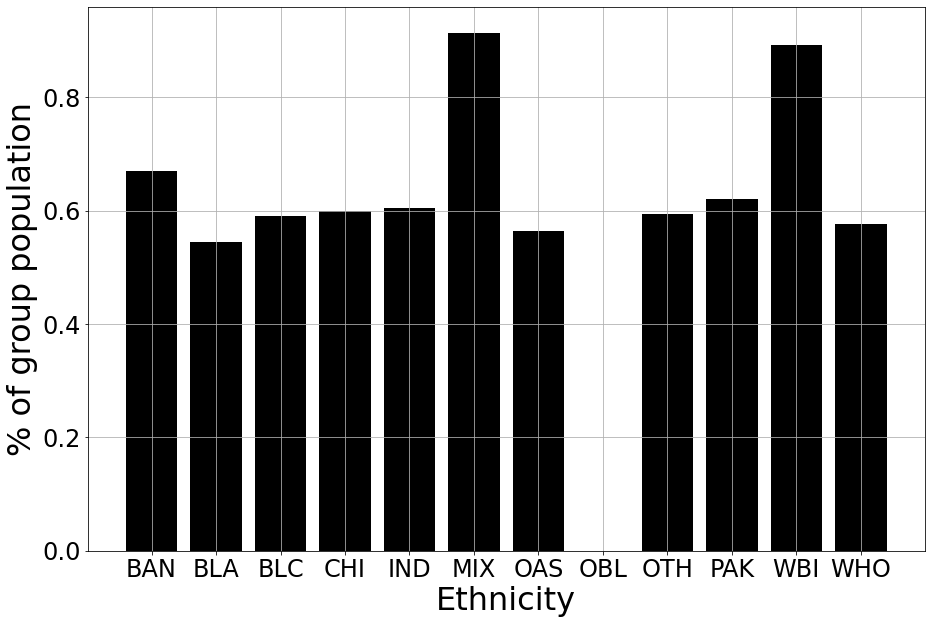

In [107]:
series2plot = pop_dead['ethnicity'].value_counts() / pop["ethnicity"].value_counts() * 100.
indx = range(len(series2plot))

plt.figure(figsize=(15, 10))
plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("% of group population", size=32)

plt.grid()
#plt.legend(fontsize=24)
plt.show()

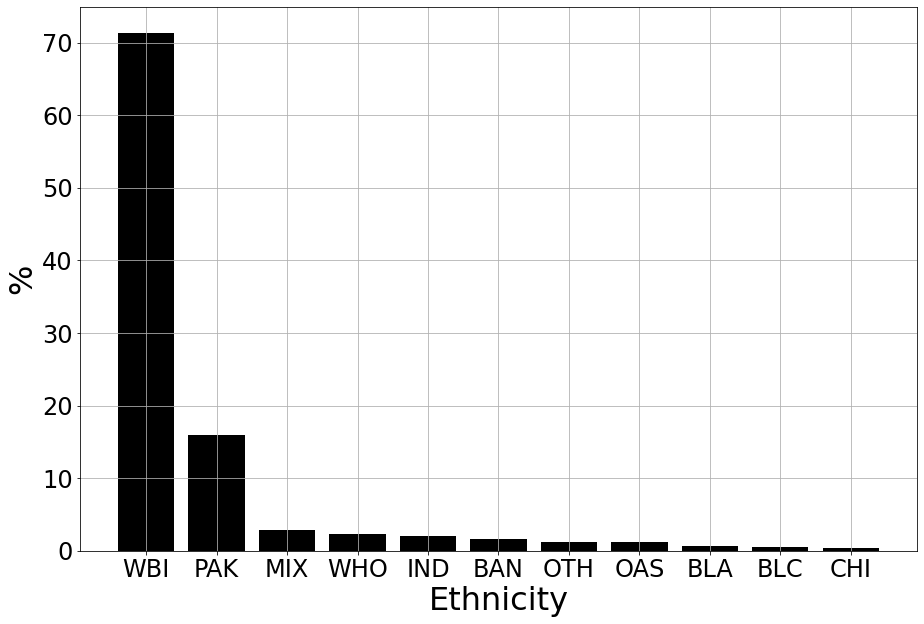

In [108]:
series2plot = pop_dead['ethnicity'].value_counts() / len(pop_dead["ethnicity"]) * 100.
indx = range(len(series2plot))

plt.figure(figsize=(15, 10))
plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("%", size=32)

plt.grid()
#plt.legend(fontsize=24)
plt.show()

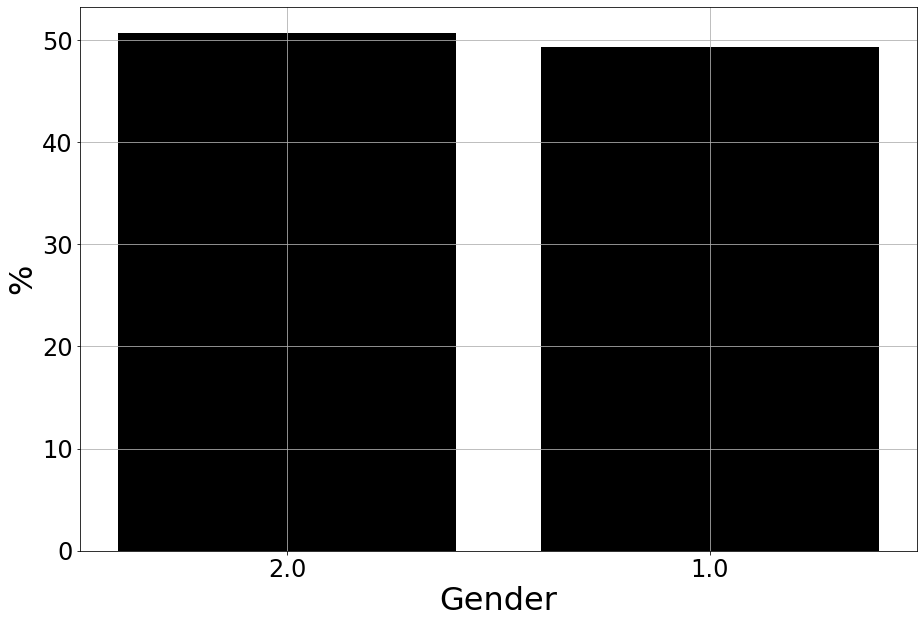

In [109]:
series2plot = pop_dead['sex'].value_counts() / len(pop_dead["sex"]) * 100.
indx = range(len(series2plot))

plt.figure(figsize=(15, 10))
plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24)
plt.yticks(size=24)
plt.xlabel("Gender", size=32)
plt.ylabel("%", size=32)

plt.grid()
#plt.legend(fontsize=24)
plt.show()

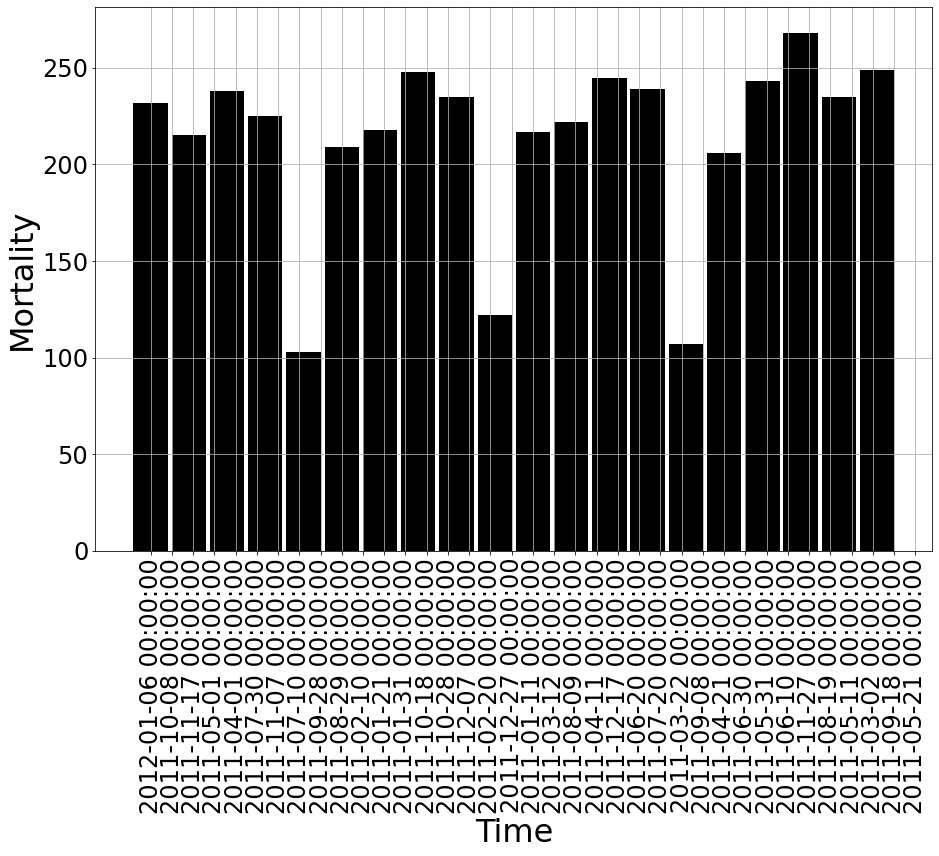

In [110]:
plt.figure(figsize=(15, 10))

pop_dead["exit_time"].hist(bins=20, 
                           rwidth=0.9, 
                           color='k',
                           align='left'
                          )
plt.xlabel("Time", size=32)
plt.ylabel("Mortality", size=32)
plt.xticks(size=24, rotation=90)
plt.yticks(size=24)
#plt.legend(fontsize=24)
plt.show()

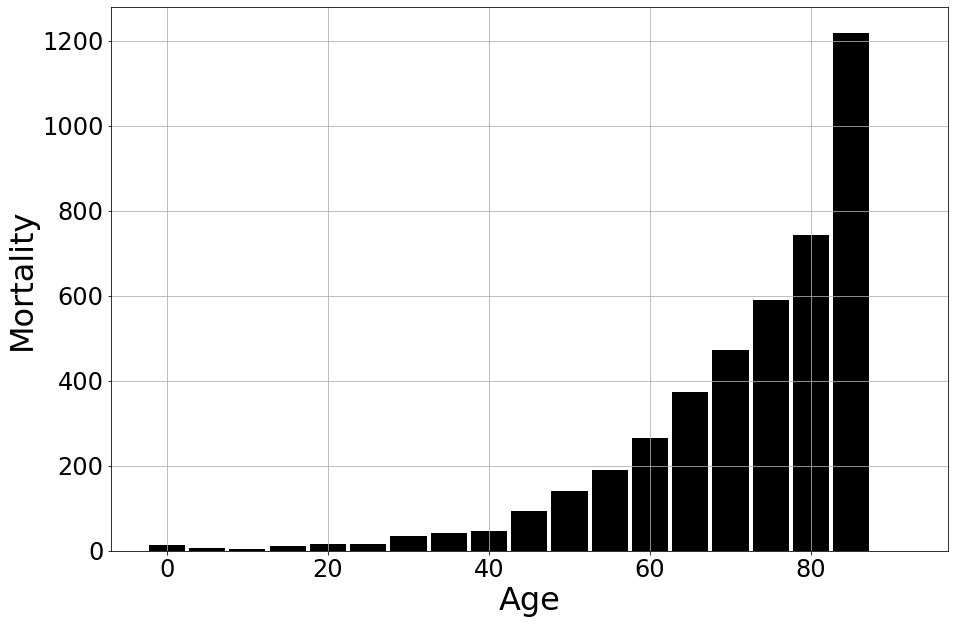

In [111]:
plt.figure(figsize=(15, 10))

pop_dead["age"].hist(bins=range(0, 100, 5), 
                     rwidth=0.9, 
                     color='k',
                     align='left'
                    )
plt.xlabel("Age", size=32)
plt.ylabel("Mortality", size=32)
plt.xticks(size=24)
plt.yticks(size=24)
#plt.legend(fontsize=24)
plt.show()

## Fertility

In [125]:
pop_births = pop[pop['parent_id']!= -1]

### Ethnicity of new births

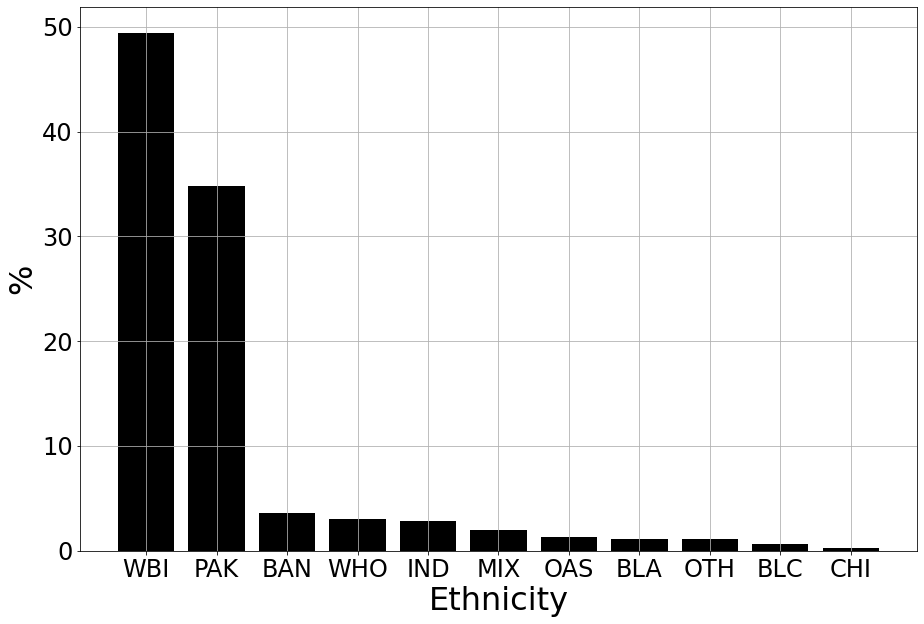

In [126]:
series2plot_births = pop_births['ethnicity'].value_counts() / len(pop_births["ethnicity"]) * 100.
indx = range(len(series2plot_births))

plt.figure(figsize=(15, 10))
plt.bar(indx, series2plot_births, color='k')

plt.xticks(indx, series2plot_births.index, size=24)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("%", size=32)

plt.grid()
#plt.legend(fontsize=24)
plt.show()

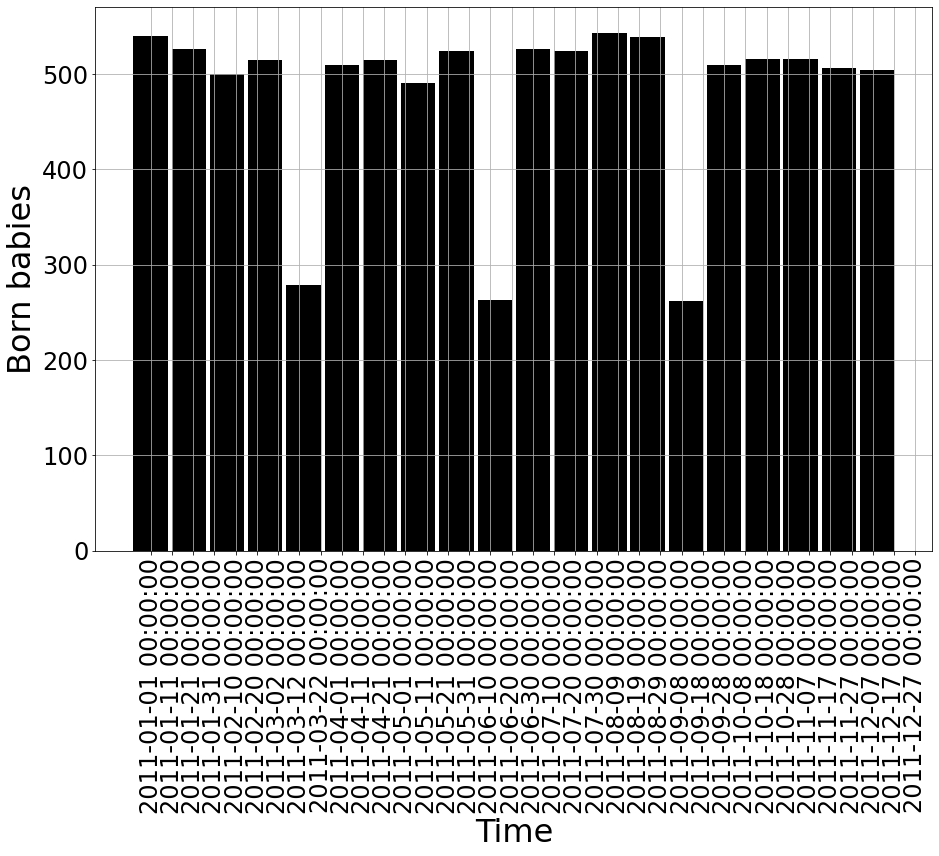

In [127]:
plt.figure(figsize=(15, 10))

pop_births["entrance_time"].hist(bins=20, 
                           rwidth=0.9, 
                           color='k',
                           align='left'
                          )
plt.xlabel("Time", size=32)
plt.ylabel("Born babies", size=32)
plt.xticks(size=24, rotation=90)
plt.yticks(size=24)
#plt.legend(fontsize=24)
plt.show()

### Age of mothers

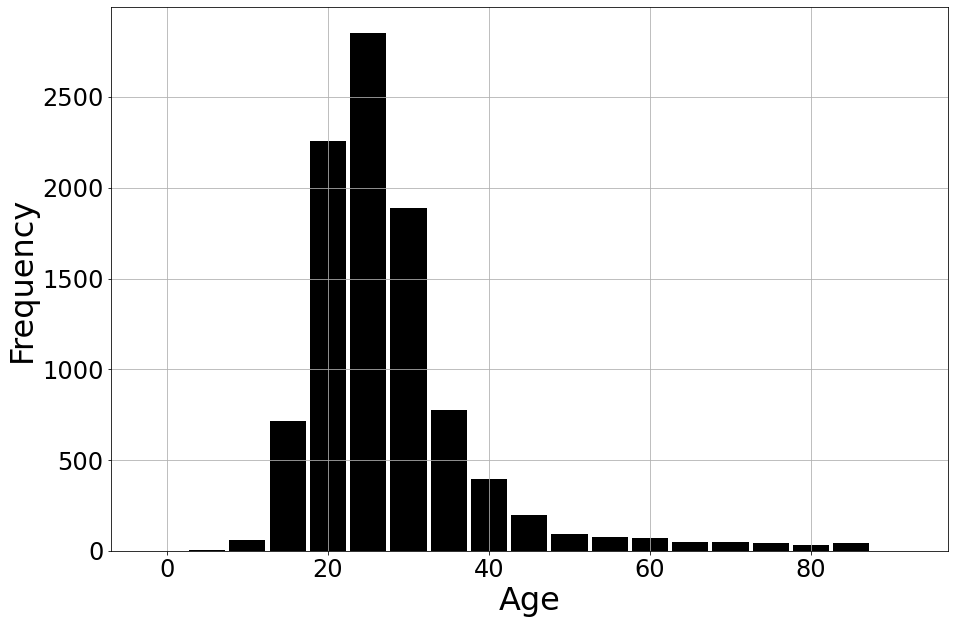

In [128]:
plt.figure(figsize=(15, 10))

pop.iloc[pop_births["parent_id"]]["age"].hist(bins=range(0, 100, 5), 
                     rwidth=0.9, 
                     color='k',
                     align='left'
                    )
plt.xlabel("Age", size=32)
plt.ylabel("Frequency", size=32)
plt.xticks(size=24)
plt.yticks(size=24)

#plt.legend(fontsize=24)
plt.show()

## Immigration

In [130]:
# only immigrants
pop_immig = pop[pop["immigrated"] =='Yes']

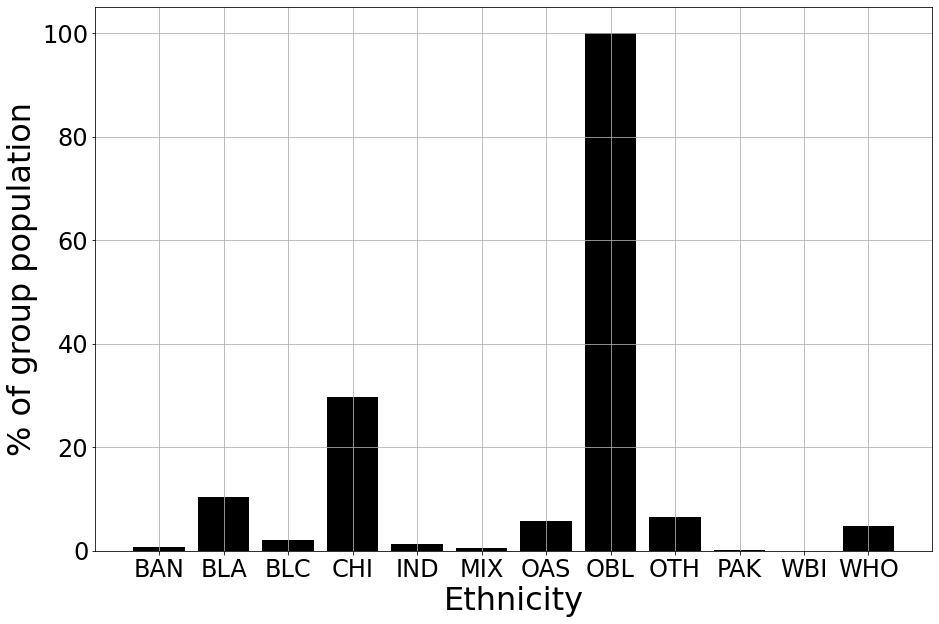

In [132]:
series2plot = pop_immig['ethnicity'].value_counts() / pop["ethnicity"].value_counts() * 100.
indx = range(len(series2plot))

plt.figure(figsize=(15, 10))
plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("% of group population", size=32)

plt.grid()
#plt.legend(fontsize=24)
plt.show()

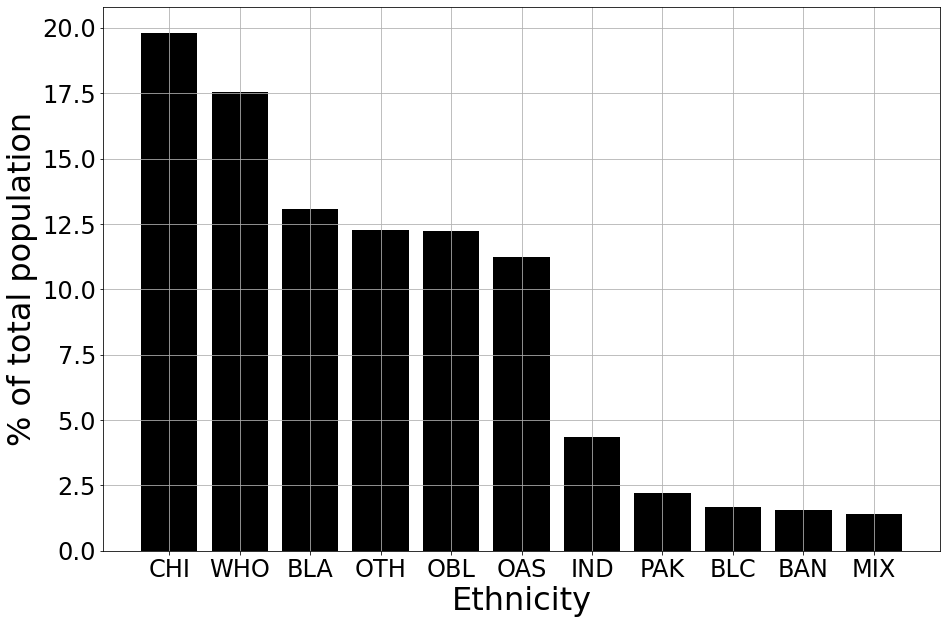

In [133]:
series2plot = pop_immig['ethnicity'].value_counts() / len(pop_immig["ethnicity"]) * 100.
indx = range(len(series2plot))

plt.figure(figsize=(15, 10))
plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("% of total population", size=32)

plt.grid()
#plt.legend(fontsize=24)
plt.show()

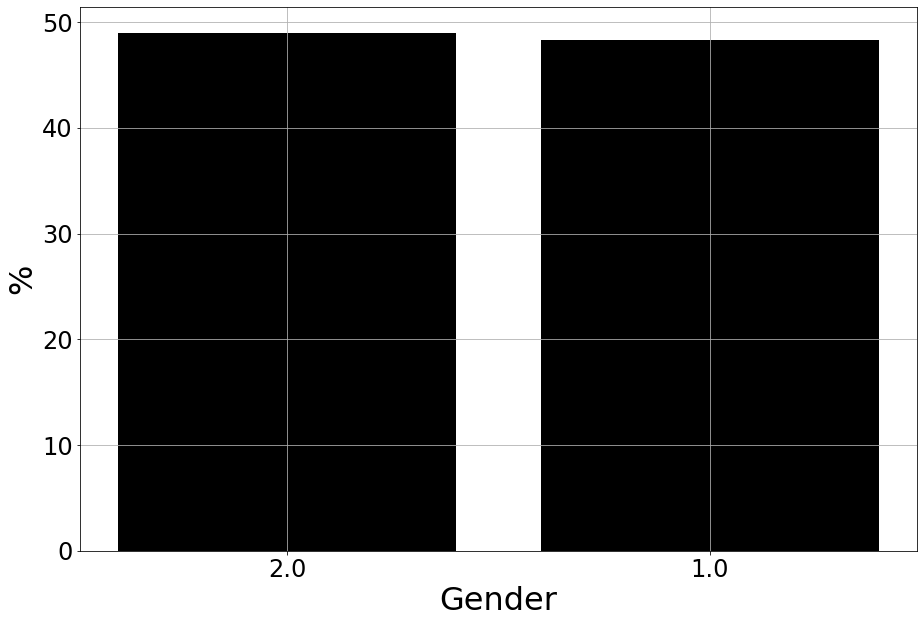

In [134]:
series2plot = pop_immig['sex'].value_counts() / len(pop_immig["sex"]) * 100.
indx = range(len(series2plot))

plt.figure(figsize=(15, 10))
plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24)
plt.yticks(size=24)
plt.xlabel("Gender", size=32)
plt.ylabel("%", size=32)

plt.grid()
#plt.legend(fontsize=24)
plt.show()

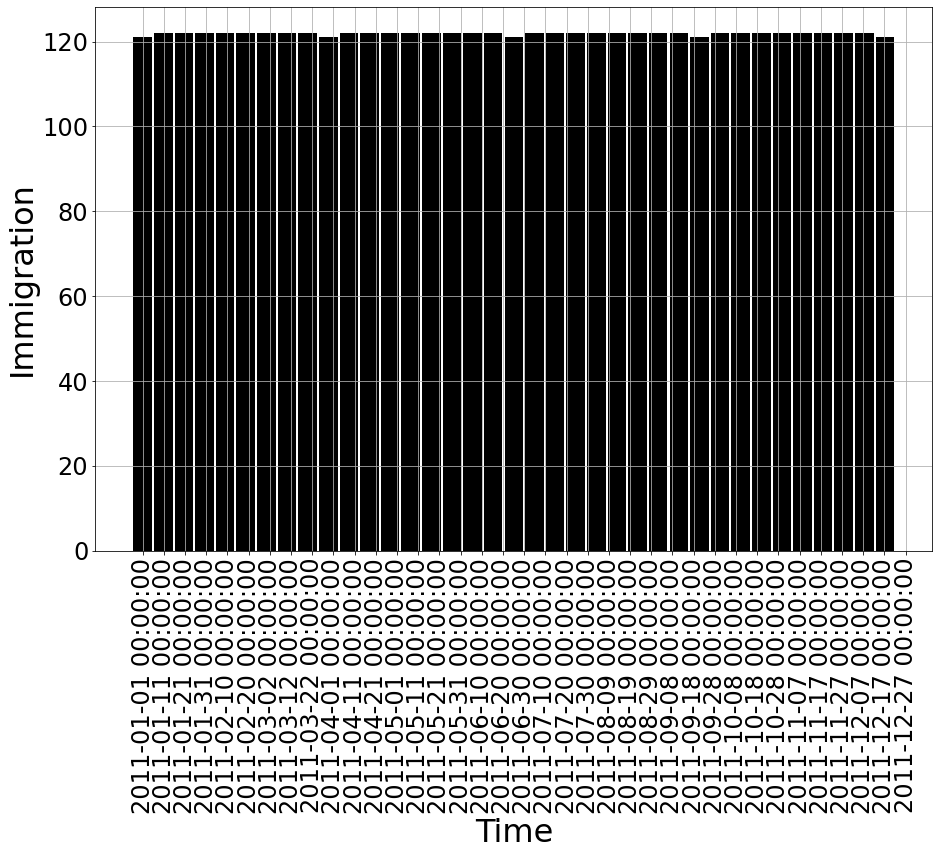

In [135]:
plt.figure(figsize=(15, 10))

pop_immig["entrance_time"].hist(bins=int((365+10)/10), 
                           rwidth=0.9, 
                           color='k',
                           align='left'
                          )
plt.xlabel("Time", size=32)
plt.ylabel("Immigration", size=32)
plt.xticks(size=24, rotation=90)
plt.yticks(size=24)
#plt.legend(fontsize=24)
plt.show()

In [146]:
#min_time = pop["entrance_time"].min().strftime("%Y-%m-%d")
min_time = "2011-01-01"
max_time = datetime.datetime.strptime("2012-01-01", "%Y-%m-%d")

print("min_time:", min_time)
print("max_time:", max_time)

min_time: 2011-01-01
max_time: 2012-01-01 00:00:00


In [147]:
# --- input
# intervals for plotting (in days)
interval_in_days = 10
# list of ethnicities
sel_ethnicity = ["WBI", "WHO"]

time_axis = []
curr_pop_axis = []
left_pop_axis = []
dead_pop_axis = []
immg_pop_axis = []
dead_immg_pop_axis = []
emig_pop_axis = []
new_babies_axis = []
avg_age_axis = []
std_age_axis = []
avg_age_adult_axis = []
std_age_adult_axis = []
pop_M_axis = []
pop_F_axis = []
pop_ETH_axis = []

curr_time = datetime.datetime.strptime(min_time, "%Y-%m-%d")
while curr_time <= max_time:
    time_axis.append(curr_time)
    
    curr_pop = pop[pop["entrance_time"] <= curr_time.strftime("%Y-%m-%d")]
    # dead population until current time (changes in the while loop)
    left_pop = curr_pop[curr_pop["exit_time"] <= curr_time.strftime("%Y-%m-%d")]
    dead_pop = left_pop[left_pop["emigrated"] != "Yes"]
    
    immg_pop = curr_pop[curr_pop["immigrated"] == "Yes"]
    dead_immg_pop = immg_pop[immg_pop["exit_time"] <= curr_time.strftime("%Y-%m-%d")]
    emig_pop = curr_pop[curr_pop["emigrated"] == "Yes"]
    new_babies = curr_pop[curr_pop["parent_id"] != -1]
    
    curr_alive_pop = curr_pop[curr_pop["alive"] == "alive"]
    curr_alive_adult_pop = curr_alive_pop[curr_alive_pop["age"] >= 20.]
    
    curr_pop_axis.append(len(curr_pop))
    left_pop_axis.append(len(left_pop))
    dead_pop_axis.append(len(dead_pop))
    immg_pop_axis.append(len(immg_pop))
    dead_immg_pop_axis.append(len(dead_immg_pop))
    emig_pop_axis.append(len(emig_pop))
    new_babies_axis.append(len(new_babies))
    avg_age_axis.append(curr_alive_pop["age"].mean())
    std_age_axis.append(curr_alive_pop["age"].std())
    avg_age_adult_axis.append(curr_alive_adult_pop["age"].mean())
    std_age_adult_axis.append(curr_alive_adult_pop["age"].std())
    
    curr_pop_male = len(curr_pop[curr_pop["sex"] == 1])
    pop_M = curr_pop_male - len(left_pop[left_pop["sex"] == 1])
    pop_M_axis.append(pop_M)
    
    curr_pop_female = len(curr_pop[curr_pop["sex"] == 2])
    pop_F = curr_pop_female - len(left_pop[left_pop["sex"] == 2])
    pop_F_axis.append(pop_F)
    
    curr_pop_eth = len(curr_pop[curr_pop["ethnicity"].isin(sel_ethnicity)])
    current_alive_population_eth = curr_pop_eth - len(left_pop[left_pop["ethnicity"].isin(sel_ethnicity)])
    pop_ETH_axis.append(current_alive_population_eth)
    
    # go to next time, according to the selected interval_in_days
    curr_time = datetime.datetime.strptime(curr_time.strftime("%Y-%m-%d"), "%Y-%m-%d")
    curr_time += datetime.timedelta(days=interval_in_days)

In [148]:
from pandas.plotting import register_matplotlib_converters


In [149]:
curr_pop_axis = np.array(curr_pop_axis)
left_pop_axis = np.array(left_pop_axis)
dead_pop_axis = np.array(dead_pop_axis)
immg_pop_axis = np.array(immg_pop_axis)
dead_immg_pop_axis = np.array(dead_immg_pop_axis)
emig_pop_axis = np.array(emig_pop_axis)
new_babies_axis = np.array(new_babies_axis)
avg_age_axis = np.array(avg_age_axis)
std_age_axis = np.array(std_age_axis)

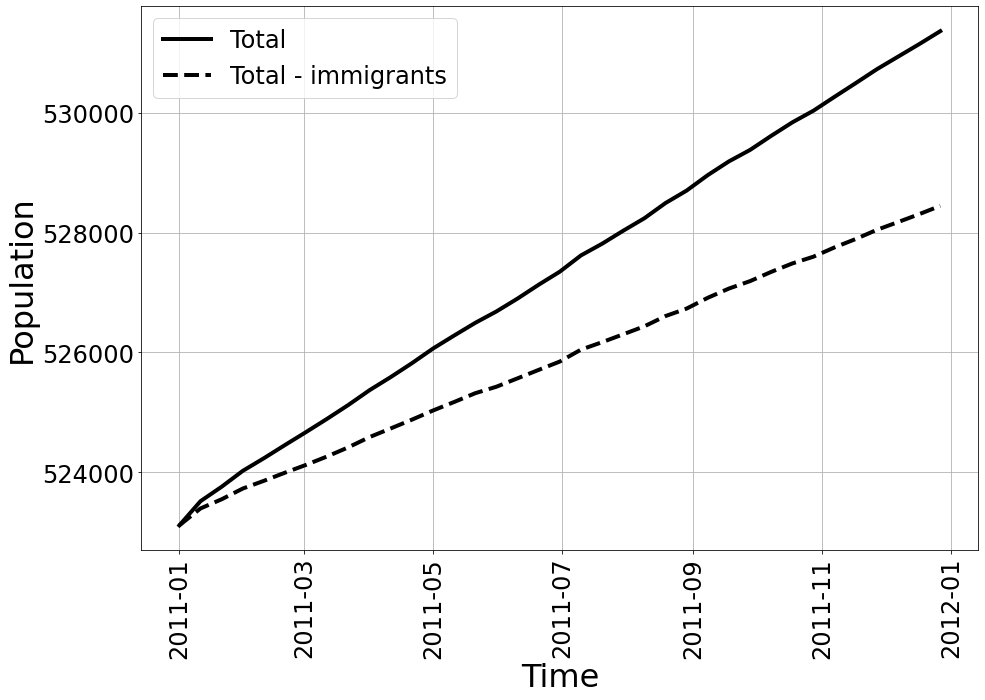

In [150]:
plt.figure(figsize=(15, 10))

plt.plot(time_axis, curr_pop_axis - left_pop_axis, 
         c='k', lw=4, 
         #marker="o",
         label="Total"
        )

plt.plot(time_axis, curr_pop_axis - dead_pop_axis - immg_pop_axis, 
         c='k', lw=4, ls='--', 
         #marker="o",
         label="Total - immigrants"
        )

plt.xlabel("Time", size=32)
plt.ylabel("Population", size=32)
plt.xticks(size=24, rotation=90)
plt.yticks(size=24)
plt.grid()
plt.legend(fontsize=24)
plt.show()


## Emigration


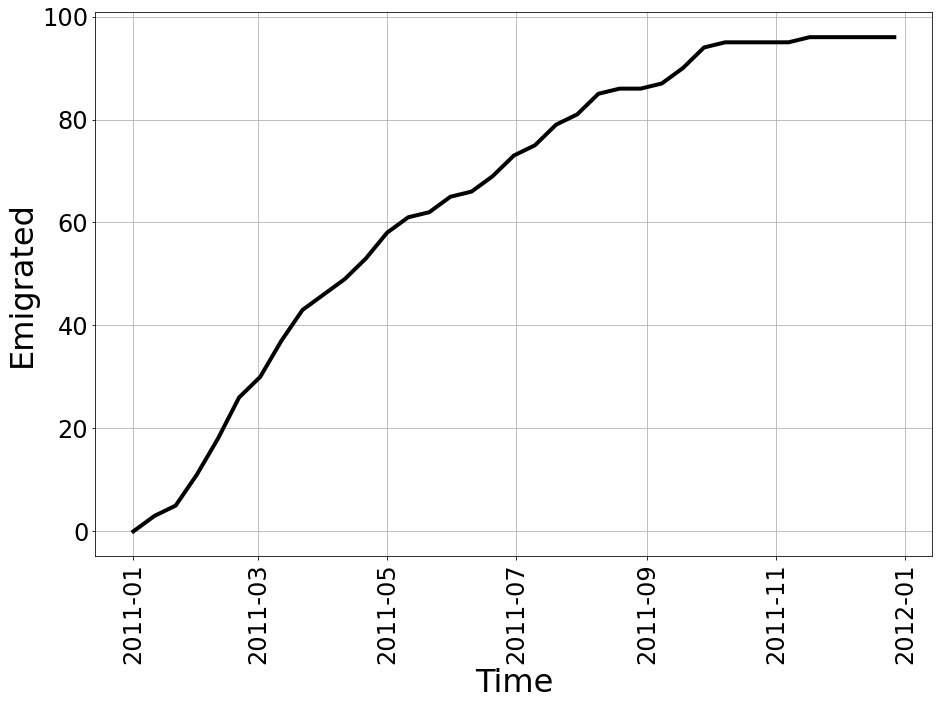

In [151]:
plt.figure(figsize=(15, 10))

# XXX Emigrated population has very high values in the first time step
plt.plot(time_axis, emig_pop_axis - emig_pop_axis[0], 
         c='k', lw=4
         #marker="o"
        )
plt.xlabel("Time", size=32)
plt.ylabel("Emigrated", size=32)
plt.xticks(size=24, rotation=90)
plt.yticks(size=24)
plt.grid()
plt.show()

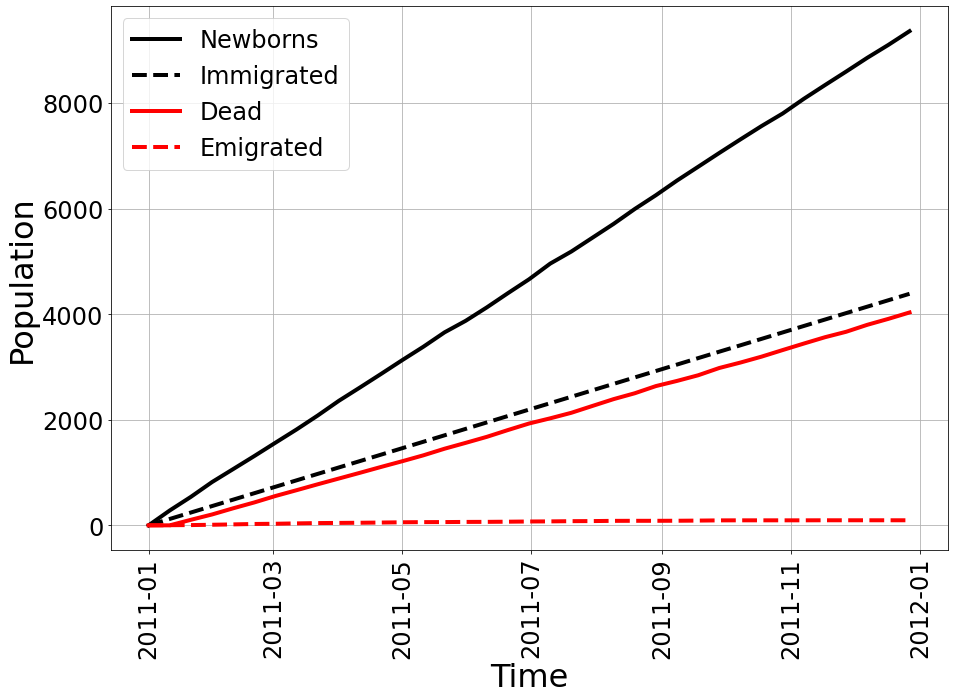

In [152]:
# Population (total)
plt.figure(figsize=(15, 10))

plt.plot(time_axis, new_babies_axis, 
         c='k', lw=4,
         #marker="o"
         label="Newborns"
        )

plt.plot(time_axis, immg_pop_axis, 
         c='k', lw=4, ls='--',
         #marker="o"
         label="Immigrated"
        )

plt.plot(time_axis, dead_pop_axis, 
         c='r', lw=4, 
         #marker="o"
         label="Dead"
        )

plt.plot(time_axis, emig_pop_axis - emig_pop_axis[0], 
         c='r', lw=4, ls='--',
         #marker="o"
         label="Emigrated"
        )

plt.xlabel("Time", size=32)
plt.ylabel("Population", size=32)
plt.xticks(size=24, rotation=90)
plt.yticks(size=24)
plt.grid()
plt.legend(fontsize=24)
plt.show()

## Internal migration

In [92]:
migrant_pool = pop[pop['internal_outmigration'] == 'Yes']
migrant_pool.head()

,Unnamed: 0,tracked,immigrated,emigrated,cause_of_death,years_of_life_lost,internal_outmigration,previous_MSOA_locations,last_outmigration_time,previous_LAD_locations,alive,location,sex,entrance_time,MSOA,age,ethnicity,exit_time,last_birth_time,parent_id
14,14,True,no_immigration,no_emigration,not_dead,0.0,Yes,E02002183,2011-04-21 00:00:00,E08000032,alive,E08000032,1.0,2010-12-22 00:00:00,E02002209,2.013699,IND,NaN,NaN,-1
27,27,True,no_immigration,no_emigration,not_dead,0.0,Yes,E02002183,2011-10-28 00:00:00,E08000032,alive,E08000032,1.0,2010-12-22 00:00:00,E02002209,3.013699,WBI,NaN,NaN,-1
40,40,True,no_immigration,no_emigration,not_dead,0.0,Yes,E02002183,2011-06-20 00:00:00,E08000032,alive,E08000032,1.0,2010-12-22 00:00:00,E02002209,3.013699,WBI,NaN,NaN,-1
48,48,True,no_immigration,no_emigration,not_dead,0.0,Yes,E02002183,2011-04-11 00:00:00,E08000032,alive,E08000032,1.0,2010-12-22 00:00:00,E02002209,4.013699,WBI,NaN,NaN,-1
72,72,True,no_immigration,no_emigration,not_dead,0.0,Yes,E02002183,2011-05-11 00:00:00,E08000032,alive,E08000032,1.0,2010-12-22 00:00:00,E02002209,5.013699,WBI,NaN,NaN,-1


## Plot results

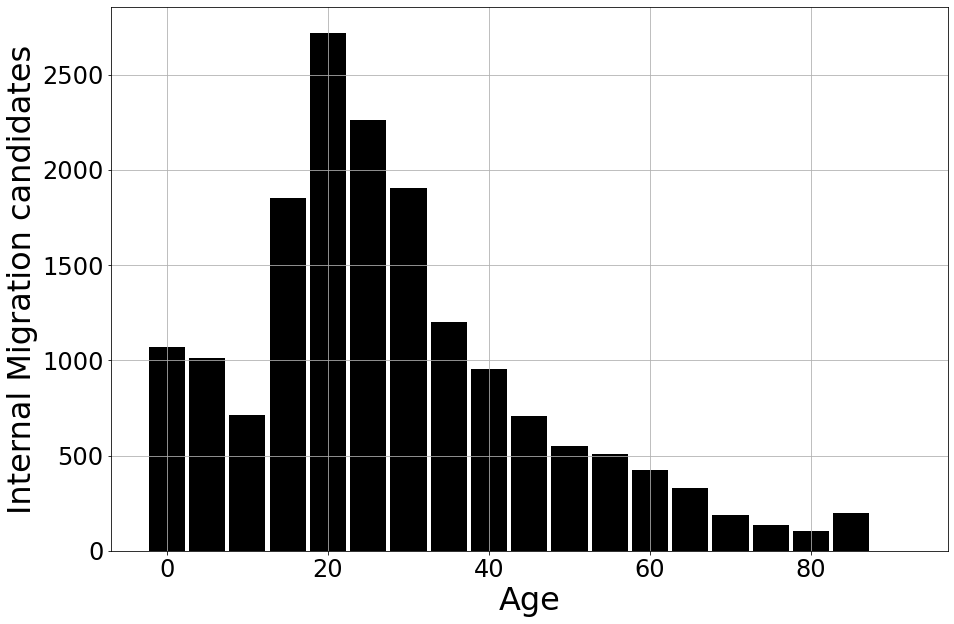

In [153]:
plt.figure(figsize=(15, 10))

migrant_pool["age"].hist(bins=range(0, 100, 5), 
                     rwidth=0.9, 
                     color='k',
                     align='left'
                    )
plt.xlabel("Age", size=32)
plt.ylabel("Internal Migration candidates", size=32)
plt.xticks(size=24)
plt.yticks(size=24)
#plt.legend(fontsize=24)
plt.show()

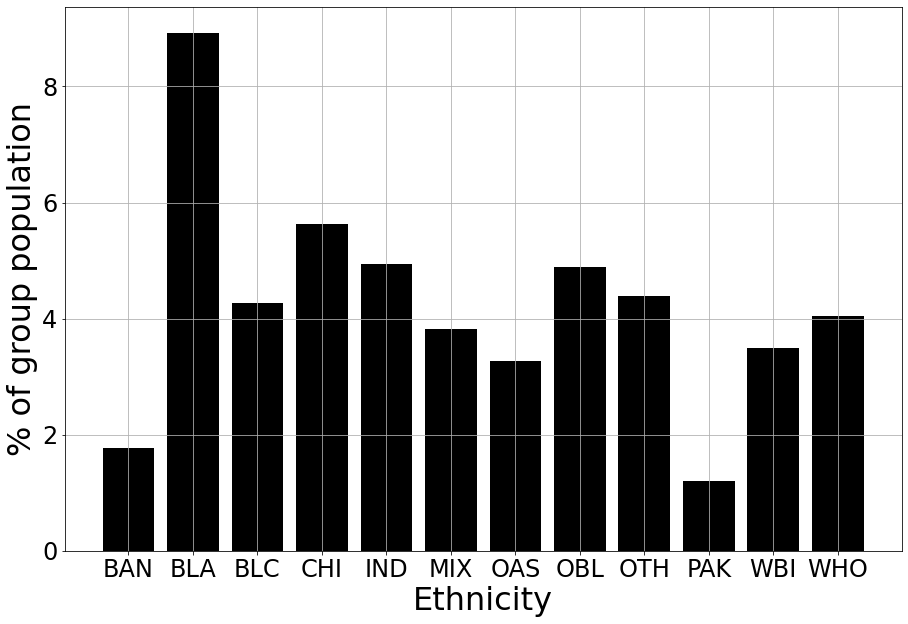

In [154]:
series2plot = migrant_pool['ethnicity'].value_counts() / pop["ethnicity"].value_counts() * 100.
indx = range(len(series2plot))

plt.figure(figsize=(15, 10))
plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("% of group population", size=32)

plt.grid()
#plt.legend(fontsize=24)
plt.show()

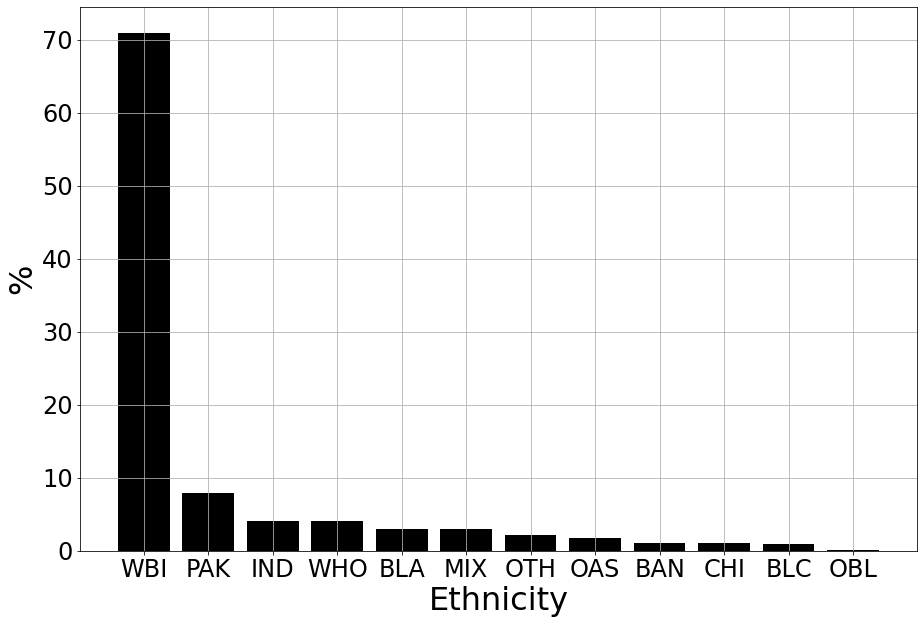

In [155]:
series2plot = migrant_pool['ethnicity'].value_counts() / len(migrant_pool["ethnicity"]) * 100.
indx = range(len(series2plot))

plt.figure(figsize=(15, 10))
plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24)
plt.yticks(size=24)
plt.xlabel("Ethnicity", size=32)
plt.ylabel("%", size=32)

plt.grid()
#plt.legend(fontsize=24)
plt.show()

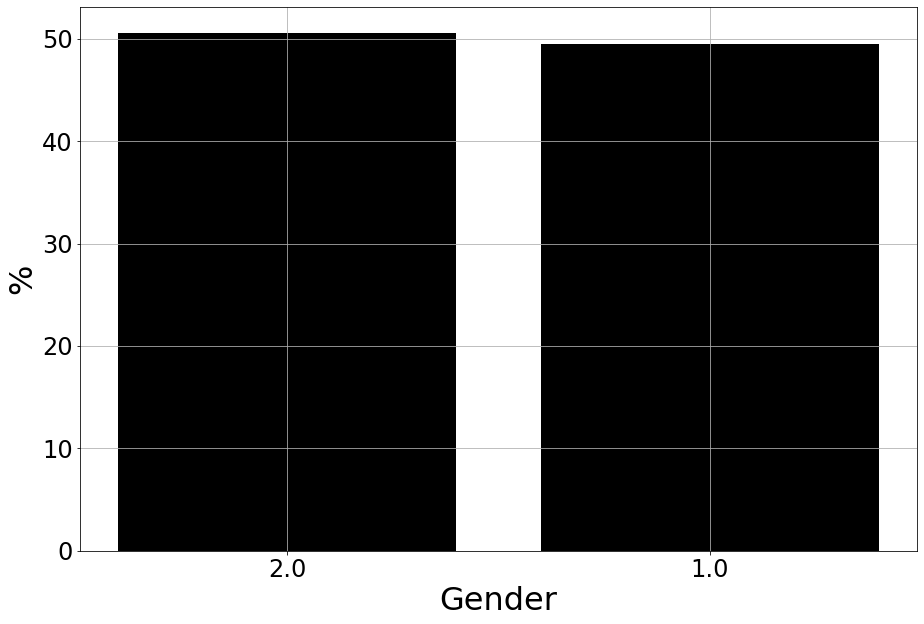

In [156]:
series2plot = migrant_pool['sex'].value_counts() / len(migrant_pool["sex"]) * 100.
indx = range(len(series2plot))

plt.figure(figsize=(15, 10))
plt.bar(indx, series2plot, color='k')

plt.xticks(indx, series2plot.index, size=24)
plt.yticks(size=24)
plt.xlabel("Gender", size=32)
plt.ylabel("%", size=32)

plt.grid()
#plt.legend(fontsize=24)
plt.show()

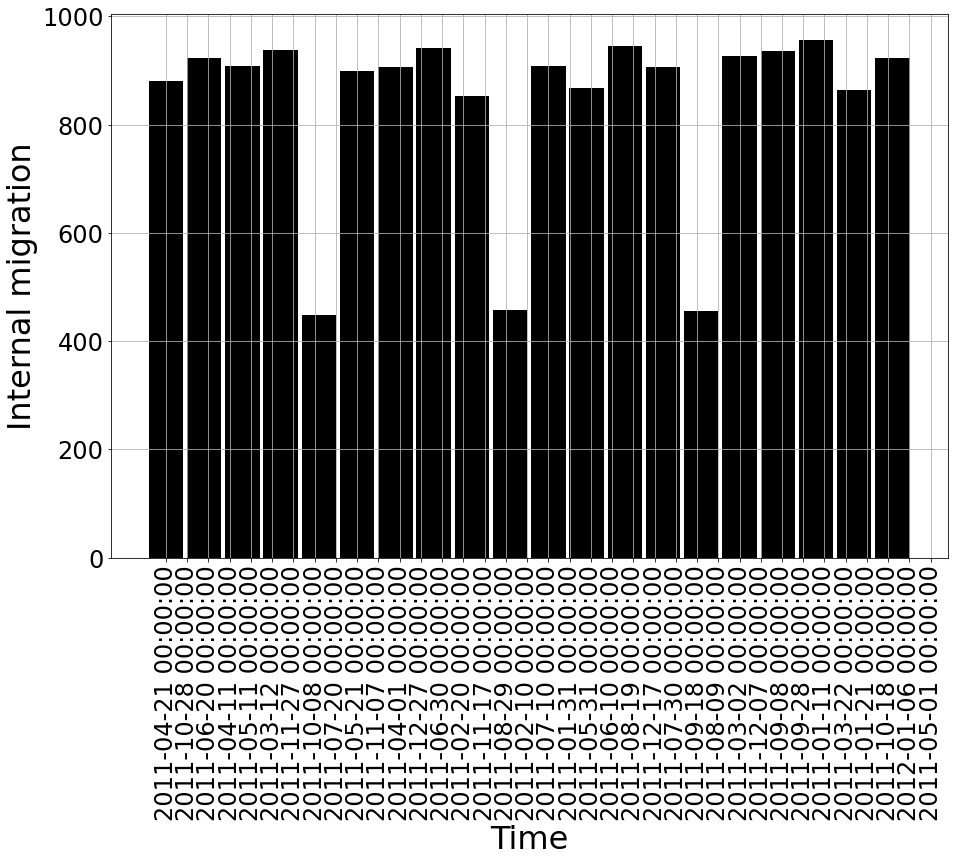

In [157]:
plt.figure(figsize=(15, 10))

migrant_pool["last_outmigration_time"].hist(bins=20, 
                                            rwidth=0.9, 
                                            color='k',
                                            align='left'
                                            )
plt.xlabel("Time", size=32)
plt.ylabel("Internal migration", size=32)
plt.xticks(size=24, rotation=90)
plt.yticks(size=24)
#plt.legend(fontsize=24)
plt.show()

In [158]:
#min_time = pop["entrance_time"].min().strftime("%Y-%m-%d")
min_time = "2011-01-01"
max_time = datetime.datetime.strptime("2011-12-31", "%Y-%m-%d")

print("min_time:", min_time)
print("max_time:", max_time)

min_time: 2011-01-01
max_time: 2011-12-31 00:00:00


In [159]:
# --- input
# intervals for plotting (in days)
interval_in_days = 10
# list of ethnicities
sel_ethnicity = ["WBI", "WHO"]

# Population (total, for selected ethnicities, gender)
total_population = len(pop)
total_population_ETH = len(pop[pop["ethnicity"].isin(sel_ethnicity)])
total_population_male = len(pop[pop["sex"] == 1])
total_population_female = len(pop[pop["sex"] == 2])

time_axis = []
population_axis = []
population_ETH_axis = []
population_M_axis = []
population_F_axis = []

curr_time = datetime.datetime.strptime(min_time, "%Y-%m-%d")
while curr_time <= max_time:
    time_axis.append(curr_time)
    
    # dead population until current time (changes in the while loop)
    pop_dead = pop[pop["last_outmigration_time"] <= curr_time.strftime("%Y-%m-%d")]
    
    num_dead_population = total_population - len(pop_dead)
    population_axis.append(num_dead_population)
    
    num_dead_population_eth = total_population_ETH - len(pop_dead[pop_dead["ethnicity"].isin(sel_ethnicity)])
    population_ETH_axis.append(num_dead_population_eth)
    
    num_dead_male = total_population_male - len(pop_dead[pop_dead["sex"] == 1])
    population_M_axis.append(num_dead_male)
    
    num_dead_female = total_population_female - len(pop_dead[pop_dead["sex"] == 2])
    population_F_axis.append(num_dead_female)
    
    # go to next time, according to the selected interval_in_days
    curr_time = datetime.datetime.strptime(curr_time.strftime("%Y-%m-%d"), "%Y-%m-%d")
    curr_time += datetime.timedelta(days=interval_in_days)

In [160]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

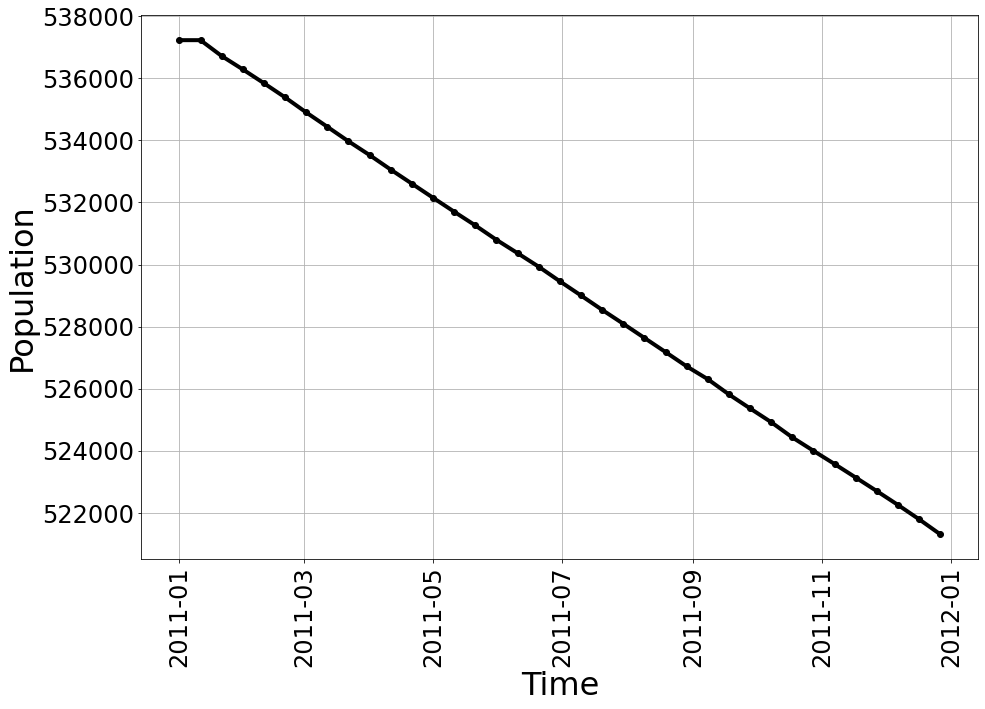

In [161]:
# Population (total)
plt.figure(figsize=(15, 10))
plt.plot(time_axis, population_axis, 
         c='k', lw=4, marker="o")
plt.xlabel("Time", size=32)
plt.ylabel("Population", size=32)
plt.xticks(size=24, rotation=90)
plt.yticks(size=24)
plt.grid()
plt.show()

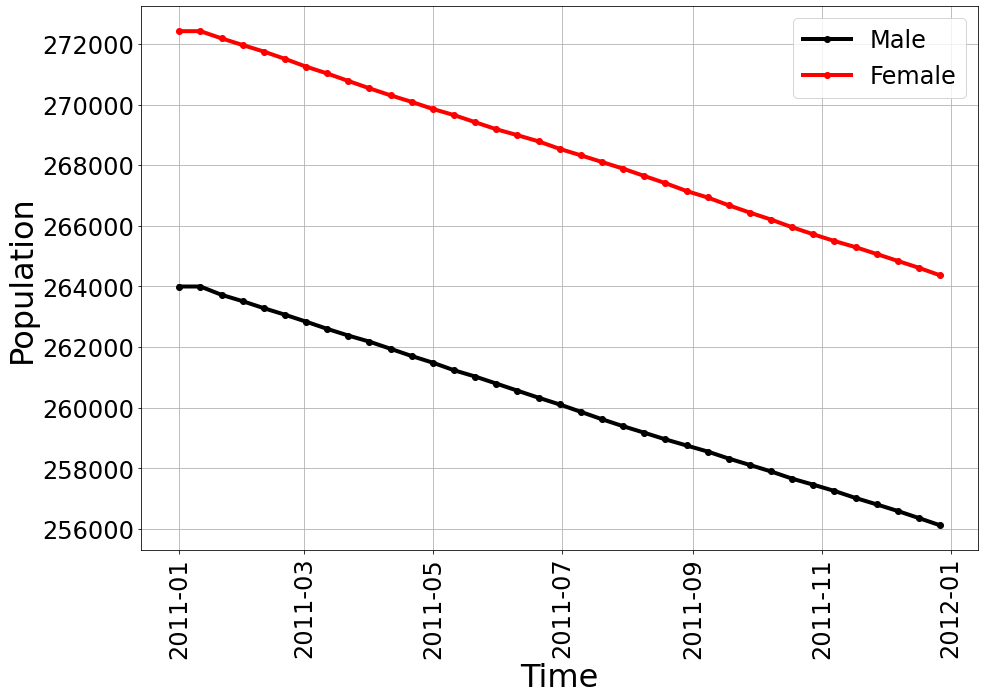

In [102]:
# Population (gender)
plt.figure(figsize=(15, 10))
plt.plot(time_axis, population_M_axis, 
         c='k', lw=4, marker="o", 
         label="Male"
        )
plt.plot(time_axis, population_F_axis, 
         c='r', lw=4, marker="o",
         label="Female"
        )
plt.xlabel("Time", size=32)
plt.ylabel("Population", size=32)
plt.xticks(size=24, rotation=90)
plt.yticks(size=24)
plt.grid()
plt.legend(fontsize=24)
plt.show()